<a href="https://colab.research.google.com/github/MDedipya/churn-modelling/blob/main/Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [ ]:
df = pd.read_csv('Churn_Modelling.csv')

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
scaler = StandardScaler()
features = df.drop("Exited", axis=1)
target = df["Exited"]
features_scaled = scaler.fit_transform(features)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

In [ ]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [ ]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    auc = roc_auc_score(y_true, y_pred)
    print("ROC-AUC Score:", auc)
    print("\n")

evaluate_model(y_test, log_pred, "Logistic Regression")
evaluate_model(y_test, rf_pred, "Random Forest")
evaluate_model(y_test, gb_pred, "Gradient Boosting")

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.82      2000
   macro avg       0.72      0.57      0.58      2000
weighted avg       0.78      0.82      0.77      2000

Confusion Matrix:
 [[1561   46]
 [ 323   70]]
ROC-AUC Score: 0.5747461408500659


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.45      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.86      0.87      0.85      2000

Confusion Matrix:
 [[1555   52]
 [ 217  176]]
ROC-AUC Score: 0.7077393591333083


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      16

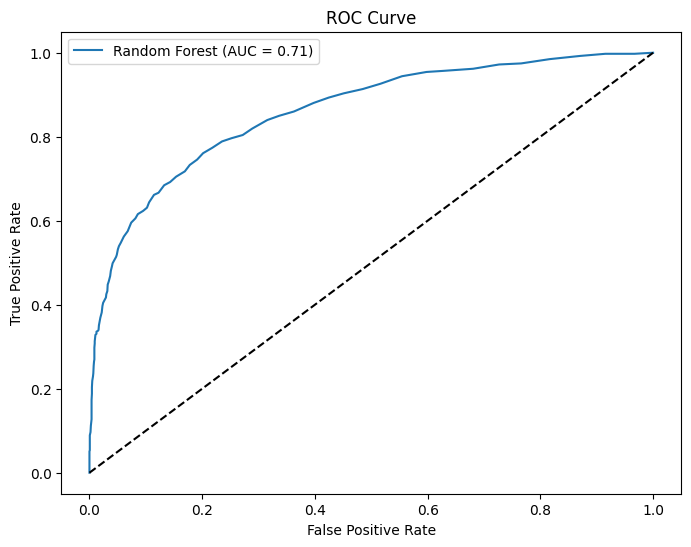

In [ ]:
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label="Random Forest (AUC = {:.2f})".format(roc_auc_score(y_test, rf_pred)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()